# Assignment 1

## Raghavendra Deshmukh

Assignment 1 CSCN8000 Artificial Intelligence Algorithms and Mathematics

1. Given the symptoms exhibited in a patient and a database of anonymized patient records, predict whether the patient is likely to have an illness (Parkinson’s disease). A model of this decision problem could be used by a program to provide decision support to medical professionals.

In [52]:
#import packages
import matplotlib.pylab as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
pk_disease_df = pd.read_csv("pd_speech_features.csv", skiprows=1)
#Skip the first while reading the dataset because it is not useful as column header.

In [3]:
pk_disease_df.head(5)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [11]:
pk_disease_df.describe

<bound method NDFrame.describe of       id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0      0       1  0.85247  0.71826  0.57227        240               239   
1      0       1  0.76686  0.69481  0.53966        234               233   
2      0       1  0.85083  0.67604  0.58982        232               231   
3      1       0  0.41121  0.79672  0.59257        178               177   
4      1       0  0.32790  0.79782  0.53028        236               235   
5      1       0  0.50780  0.78744  0.65451        226               221   
6      2       1  0.76095  0.62145  0.54543        322               321   
7      2       1  0.83671  0.62079  0.51179        318               317   
8      2       1  0.80826  0.61766  0.50447        318               317   
9      3       0  0.85302  0.62247  0.54855        493               492   
10     3       0  0.80657  0.67256  0.61745        488               487   
11     3       0  0.82653  0.58326  0.44555        498

The class column is the calssifier where 0 is not having disease and 1 is having disease

In [12]:
print(pk_disease_df.drop_duplicates())
print(pk_disease_df.isnull().sum())
print(pk_disease_df.empty)

      id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0      0       1  0.85247  0.71826  0.57227        240               239   
1      0       1  0.76686  0.69481  0.53966        234               233   
2      0       1  0.85083  0.67604  0.58982        232               231   
3      1       0  0.41121  0.79672  0.59257        178               177   
4      1       0  0.32790  0.79782  0.53028        236               235   
5      1       0  0.50780  0.78744  0.65451        226               221   
6      2       1  0.76095  0.62145  0.54543        322               321   
7      2       1  0.83671  0.62079  0.51179        318               317   
8      2       1  0.80826  0.61766  0.50447        318               317   
9      3       0  0.85302  0.62247  0.54855        493               492   
10     3       0  0.80657  0.67256  0.61745        488               487   
11     3       0  0.82653  0.58326  0.44555        498               497   
12     4    

In [13]:
#Group by gnder pk_disease_df
# 0 represnts male and 1 represents as female
genderGroupby = pk_disease_df.groupby("gender")['class'].sum().reset_index()
genderGroupby = genderGroupby

In [18]:
#check for missing values
print(pk_disease_df.isnull().sum())

# check for duplicate rows
print(f"Duplicate rows count = {pk_disease_df.duplicated().sum()}")

id                            0
gender                        0
PPE                           0
DFA                           0
RPDE                          0
numPulses                     0
numPeriodsPulses              0
meanPeriodPulses              0
stdDevPeriodPulses            0
locPctJitter                  0
locAbsJitter                  0
rapJitter                     0
ppq5Jitter                    0
ddpJitter                     0
locShimmer                    0
locDbShimmer                  0
apq3Shimmer                   0
apq5Shimmer                   0
apq11Shimmer                  0
ddaShimmer                    0
meanAutoCorrHarmonicity       0
meanNoiseToHarmHarmonicity    0
meanHarmToNoiseHarmonicity    0
minIntensity                  0
maxIntensity                  0
meanIntensity                 0
f1                            0
f2                            0
f3                            0
f4                            0
                             ..
tqwt_kur

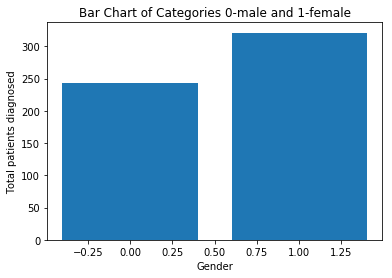

In [19]:
# Create the bar chart
plt.bar(genderGroupby['gender'], genderGroupby['class'])

plt.xlabel('Gender')
plt.ylabel('Total patients diagnosed')
plt.title('Bar Chart of Categories 0-male and 1-female')

# Show the plot
plt.show()

Looks like women are diagnosed more than men

But lets check the ratio for both of them, because we are not considering equal size in dataset


In [20]:
# Group the data by 'Category' and 'Subcategory' columns and get the count for each group
grouped_data = pk_disease_df.groupby(['gender', 'class']).size().reset_index(name='Count')

# Replace values with their categories for understanding
grouped_data['gender'] = grouped_data['gender'].replace(0, 'Male')
grouped_data['gender'] = grouped_data['gender'].replace(1, 'Female')

grouped_data['class'] = grouped_data['class'].replace(0, 'Not_diagnosed')
grouped_data['class'] = grouped_data['class'].replace(1, 'Diagnosed')
grouped_data

,gender,class,Count
0,Male,Not_diagnosed,123
1,Male,Diagnosed,243
2,Female,Not_diagnosed,69
3,Female,Diagnosed,321


([<matplotlib.patches.Wedge at 0x21ab59dc940>,
 [Text(-0.5380815169042071, 0.9594103820399629, 'Male_Not_diagnosed'),
  Text(-0.9850389076642474, -0.4895899819110134, 'Male_Diagnosed'),
  Text(0.20450278113079662, -1.0808231180492809, 'Female_Not_diagnosed'),
  Text(1.0692859543286173, 0.25812312541796506, 'Female_Diagnosed')],
 [Text(-0.2934990092204766, 0.5233147538399797, '16.3%'),
  Text(-0.537293949635044, -0.2670490810423709, '32.1%'),
  Text(0.11154697152588905, -0.5895398825723349, '9.1%'),
  Text(0.5832468841792456, 0.14079443204616274, '42.5%')])

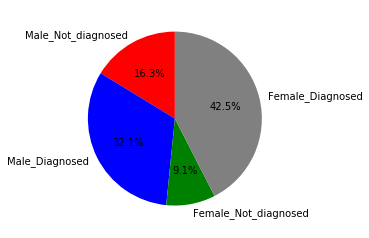

In [31]:
# Draw pie chart to see the perncentage of distribution
plt.pie(grouped_data['Count'], labels=grouped_data['gender'] + "_"+ grouped_data['class'], autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'green', 'gray', 'purple'])

* Female Diagnosed more compare to male diagnosed with this disease

### Drop unnecessary features

In [32]:
pk_disease_df_target = pk_disease_df["class"]
print(pk_disease_df_target)
X_pk_disease_df = pk_disease_df.drop(["class", "id"], axis=1)
print(X_pk_disease_df)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
726    0
727    0
728    0
729    1
730    1
731    1
732    0
733    0
734    0
735    0
736    0
737    0
738    0
739    0
740    0
741    1
742    1
743    1
744    1
745    1
746    1
747    1
748    1
749    1
750    0
751    0
752    0
753    0
754    0
755    0
Name: class, Length: 756, dtype: int64
     gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0         1  0.85247  0.71826  0.57227        240               239   
1         1  0.76686  0.69481  0.53966        234               233   
2         1  0.85083  0.67604  0.58982        232               231   
3         0  0.41121  0.79672  0.59257        178               177   
4         0  0.32790  0.79782  0.53028        236        

#### Standardizing the featueres now 

In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_standardized = scaler.fit_transform(X_pk_disease_df.drop(["gender"], axis=1))

# Convert the standardized array back to a DataFrame
pk_disease_df_Standardized = pd.DataFrame(X_standardized, columns=X_pk_disease_df.drop("gender", axis=1).columns)
pk_disease_df_Standardized

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.627644,0.256144,0.605835,-0.846892,-0.842373,0.933328,-0.407251,-0.054993,0.037843,0.066329,...,-0.445877,-0.584822,-0.619412,-0.576762,-0.482286,-0.399331,-0.484533,-0.775137,-0.814727,-0.366595
1,0.121620,-0.080433,0.368415,-0.907404,-0.902773,1.040014,-0.426092,-0.142570,-0.027698,-0.086722,...,-0.445730,-0.584895,-0.589778,0.193084,0.016183,-0.067120,-0.175566,-0.526647,-0.582972,0.400396
2,0.617950,-0.349839,0.733609,-0.927575,-0.922907,1.084576,-0.443557,-0.214916,-0.088871,-0.035705,...,-0.446030,-0.584767,-0.629033,-0.356261,-0.156055,-0.067593,-0.463462,-0.756063,-0.804390,-0.780935
3,-1.980560,1.382279,0.753631,-1.472186,-1.466513,2.464215,-0.275316,0.710353,1.256919,0.903010,...,-0.321598,-0.532242,-0.591137,-0.522406,0.008400,-0.449894,-0.470865,-0.633475,-0.588387,-0.801583
4,-2.472989,1.398068,0.300123,-0.887233,-0.882640,0.987044,3.143597,1.152045,1.178269,1.076468,...,-0.300835,-0.475545,-0.521356,-0.490090,-0.404833,-0.249678,-0.042021,-0.419354,-0.672216,-0.741477
5,-1.409635,1.249084,1.204591,-0.988087,-1.023575,0.696465,3.181440,2.096353,1.877380,1.749894,...,-0.337330,-0.508020,-0.544917,-0.453410,-0.393127,-0.394581,-0.303152,-0.724533,-0.779770,-0.826001
6,0.086687,-1.133368,0.410424,-0.019891,-0.016898,-0.202175,-0.379107,-0.039762,-0.150043,-0.249977,...,-0.445705,2.157492,1.609430,0.527414,-0.307797,-0.512774,-0.474852,-0.124995,-0.063893,-0.693159
7,0.534490,-1.142841,0.165505,-0.060232,-0.057165,-0.156774,-0.339951,0.188699,0.015996,-0.270384,...,-0.445112,-0.530443,-0.335822,-0.442733,-0.474414,-0.482484,-0.392774,-0.193738,0.231647,-0.772803
8,0.366327,-1.187766,0.112211,-0.060232,-0.057165,-0.165906,-0.431317,-0.272032,-0.306032,-0.341808,...,-0.444384,-0.568184,-0.504251,-0.555293,-0.479505,-0.482968,-0.529105,-0.754821,-0.771658,-0.807935
9,0.630895,-1.118728,0.433140,1.704710,1.704520,-1.342185,-0.471748,-0.599493,-0.603155,-0.525469,...,-0.419943,-0.582035,-0.637725,-0.618175,-0.517403,-0.503394,-0.522559,-0.690890,-0.615031,0.211644


In [37]:
# Standardize the features to have zero mean and unit variance
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Create a PCA object and specify the number of components you want to keep
pca_obj = PCA(n_components=5)

# Apply PCA to the scaled features
X_reduced = pca_obj.fit_transform(X_standardized)

# Convert the reduced data to a new DataFrame if needed
df_reduced = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(5)])
df_reduced

,PC1,PC2,PC3,PC4,PC5
0,-9.987960,1.488595,-6.841434,-0.819237,-3.401196
1,-10.577598,1.604490,-6.826496,1.382776,-3.173449
2,-13.474037,-1.214794,-6.809950,1.379781,-2.256104
3,-9.166986,9.011695,15.264944,-4.011950,-5.096876
4,-6.799018,4.770293,15.623076,-5.837799,-5.738466
5,-4.556145,1.907019,21.286875,-5.616538,-2.841891
6,4.599527,8.104251,0.271226,-1.035748,1.571361
7,2.906837,6.841719,0.284638,-5.272563,0.309398
8,3.408381,5.610640,-1.715679,-2.799527,-1.927721
9,12.277269,-9.180958,-2.290234,0.224137,-2.388537


#### Lets split the data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(pk_disease_df_Standardized, pk_disease_df_target, test_size=0.2, random_state=50)

In [44]:
#Now train the model
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [45]:
#Do predictions
y_pred = model.predict(X_test)

In [46]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
      dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.822


Accuracy of 0.822 is considered good

Do Cross Validation to verify it is not overfitting


In [50]:
logisticmodel = LogisticRegression()
logisticmodel.fit(pk_disease_df_Standardized, pk_disease_df_target)

C:\Users\Ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [51]:
from sklearn.model_selection import StratifiedKFold

def stratified_k_fold_cross_validation(X, y, k):
    # Create StratifiedKFold cross-validation object
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=56)
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=skf)
    return scores

# Call the function with your data and desired number of folds (e.g., k=5)
scores = stratified_k_fold_cross_validation(pk_disease_df_Standardized, pk_disease_df_target, k=5)

# Print the accuracy for each fold
for i, score in enumerate(scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")

# Print the mean and standard deviation of accuracies
print(f"Mean Accuracy: {np.mean(scores):.2f}")


C:\Users\Ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

Fold 1 - Accuracy: 0.84
Fold 2 - Accuracy: 0.86
Fold 3 - Accuracy: 0.82
Fold 4 - Accuracy: 0.87
Fold 5 - Accuracy: 0.79
Mean Accuracy: 0.84


C:\Users\Ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 20  12]
 [ 15 105]]


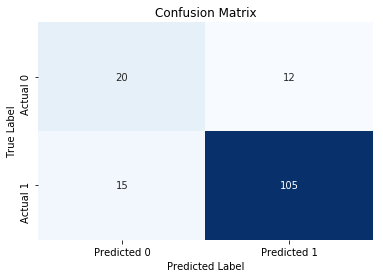

In [54]:

conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix will be displayed as a heatmap with coloured cells, where the intensity of the colour denotes how many instances are present in each cell. With the help of this visualization, you can immediately spot trends in both accurate and inaccurate predictions.

**Conclusion**

My analysis showed that the Logistic Regression could predict Parkinson's disease status with fairly high accuracy